In [2]:
import os

import sys
os.chdir("/Users/zyxu/Documents/py/kris/open-problems-multimodal")
import numpy as np
import pandas as pd
import h5py
import hdf5plugin

import gc

In [3]:
# visualizations
# import plotly.express as px
# import plotly.offline as pyo
# import plotly
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

custom_colors = ["#a8e6cf","#dcedc1","#ffd3b6","#ffaaa5","#ff8b94"]
palette = sns.set_palette(sns.color_palette(custom_colors))

In [6]:
# calculate file size in KB, MB, GB
def convert_bytes(size):
    """ Convert bytes to KB, or MB or GB"""
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return "%3.1f %s" % (size, x)
        size /= 1024.0

file_list = [
    'train_cite_inputs.h5', 
    'train_cite_targets.h5', 
    'train_multi_inputs.h5', 
    'train_multi_targets.h5',
    'test_cite_inputs.h5', 
    'test_multi_inputs.h5',
    'test_cite_inputs_day_2_donor_27678.h5',
    'metadata.csv',
    'evaluation_ids.csv',
    'sample_submission.csv'
    ]
for f in file_list:
  f_path = f'{f}' 
  f_size = os.path.getsize(f_path)
  f_size_converted = convert_bytes(f_size)
  print(f'{f} :', f_size_converted)

train_cite_inputs.h5 : 2.3 GB
train_cite_targets.h5 : 36.8 MB
train_multi_inputs.h5 : 10.6 GB
train_multi_targets.h5 : 3.0 GB
test_cite_inputs.h5 : 1.6 GB
test_multi_inputs.h5 : 6.0 GB
test_cite_inputs_day_2_donor_27678.h5 : 293.7 MB
metadata.csv : 9.3 MB
evaluation_ids.csv : 2.3 GB
sample_submission.csv : 804.5 MB


In [4]:
metadata = pd.read_csv("metadata.csv")
metadata.head()

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [8]:
def basicSummary(dataFrameForSummary):
    print('\n\033[1;30;34mThis Datset consists of \033[0;0m\033[1m {}\033[0m \033[1;31;31mFeatures\033[0;0m & \033[1m{}\033[0m \033[1;31;32mSamples.\033[0;0m\n'.format(dataFrameForSummary.shape[1], dataFrameForSummary.shape[0]))
    summary = pd.DataFrame(dataFrameForSummary.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Num of Nulls'] = dataFrameForSummary.isnull().sum().values
    summary['Num of Unique'] = dataFrameForSummary.nunique().values
    summary['First Value'] = dataFrameForSummary.loc[0].values
    summary['Num of NaNs'] = dataFrameForSummary.isna().sum().values
    return summary

In [6]:
display(basicSummary(metadata))


This Datset consists of  5 Features & 281528 Samples.



,Feature,Data Type,Num of Nulls,Num of Unique,First Value,Num of NaNs
0,cell_id,object,0,281528,c2150f55becb,0
1,day,int64,0,5,2,0
2,donor,int64,0,4,27678,0
3,cell_type,object,0,8,HSC,0
4,technology,object,0,2,citeseq,0


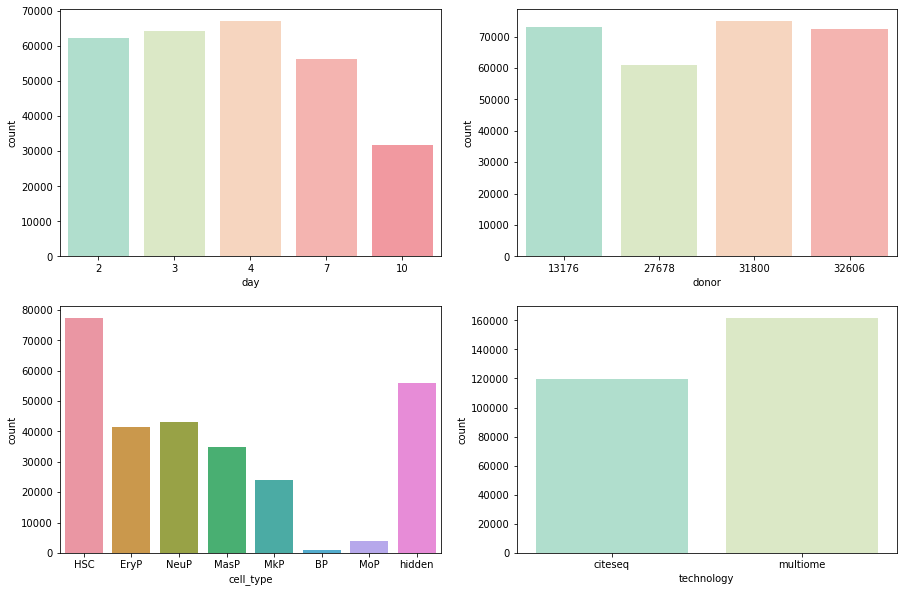

In [7]:
(ax1,ax2), (ax3,ax4) = plt.figure(figsize = (15,10)).subplots(2,2)
sns.countplot(data=metadata, x ='day', ax=ax1, palette = palette)
sns.countplot(data=metadata, x ='donor', ax=ax2,palette = palette)
sns.countplot(data=metadata, x ='cell_type', ax=ax3, palette = palette)
sns.countplot(data=metadata, x ='technology', ax=ax4,palette = palette)

plt.show()

In [8]:
metadata.describe().T

,count,mean,std,min,25%,50%,75%,max
day,281528.0,4.606348,2.570123,2.0,3.0,4.0,7.0,10.0
donor,281528.0,26270.952445,7967.233157,13176.0,13176.0,31800.0,32606.0,32606.0


In [ ]:
evaluation = pd.read_csv("evaluation_ids.csv")
# display(basicSummary(evaluation))

In [15]:
print(evaluation.shape)
evaluation.head()

(65744180, 3)


,row_id,cell_id,gene_id
0,0,c2150f55becb,CD86
1,1,c2150f55becb,CD274
2,2,c2150f55becb,CD270
3,3,c2150f55becb,CD155
4,4,c2150f55becb,CD112


In [9]:
display(basicSummary(evaluation))


This Datset consists of  3 Features & 65744180 Samples.



,Feature,Data Type,Num of Nulls,Num of Unique,First Value,Num of NaNs
0,row_id,int64,0,65744180,0,0
1,cell_id,object,0,65443,c2150f55becb,0
2,gene_id,object,0,23558,CD86,0


1294783380

In [11]:
submission = pd.read_csv("sample_submission.csv")

In [16]:
print(submission.shape)
submission.head()

(65744180, 2)


,row_id,target
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [12]:
display(basicSummary(submission))


This Datset consists of  2 Features & 65744180 Samples.



,Feature,Data Type,Num of Nulls,Num of Unique,First Value,Num of NaNs
0,row_id,int64,0,65744180,0.0,0
1,target,float64,0,1,0.0,0


# Multiome
train_multi_inputs and train_multi_targets

In [9]:
train_multi_inputs = "train_multi_inputs.h5"

In [10]:
with h5py.File(train_multi_inputs, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    print(a_group_key)

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])
    
    group = f[a_group_key]      # returns as a h5py dataset object

    print(list(group.keys()))

    ## customized
    axis0 = group['axis0']
    print(type(axis0))

    axis0 = axis0[()]
    axis1 = group['axis1'][()]
    block0_items = group['block0_items'][()]
    block0_values = group['block0_values'][()]

Keys: <KeysViewHDF5 ['train_multi_inputs']>
train_multi_inputs
<class 'h5py._hl.group.Group'>
['axis0', 'axis1', 'block0_items', 'block0_values']
<class 'h5py._hl.dataset.Dataset'>


In [11]:
print(f"axis0 shape is {axis0.shape}\naxis1 shape is {axis1.shape}\nblock0_items shape is {block0_items.shape}\nblock0_values shape is {block0_values.shape}\n")

axis0 shape is (228942,)
axis1 shape is (105942,)
block0_items shape is (228942,)
block0_values shape is (105942, 228942)



##### axis0 and block0_items represents genome locations.

Genomic coordinates are directly related to the reference genome, and include the chromosome name, start position, and end position in the following format: chr1:1234570-1234870.

In [12]:
sum(axis0 != block0_items)
geno_loc = np.char.decode(axis0)
geno_loc[:20]
# this 

array(['GL000194.1:114519-115365', 'GL000194.1:55758-56597',
       'GL000194.1:58217-58957', 'GL000194.1:59535-60431',
       'GL000195.1:119766-120427', 'GL000195.1:120736-121603',
       'GL000195.1:137437-138345', 'GL000195.1:15901-16653',
       'GL000195.1:22357-23209', 'GL000195.1:23751-24619',
       'GL000195.1:24987-25739', 'GL000195.1:30343-31248',
       'GL000195.1:32231-33125', 'GL000195.1:66612-67353',
       'GL000195.1:68120-69034', 'GL000195.1:71120-71904',
       'GL000195.1:86114-87015', 'GL000205.2:135765-136571',
       'GL000205.2:136709-137225', 'GL000205.2:140323-141187'],
      dtype='<U26')

__axis1__ represents cell_id

In [13]:
cell_id = np.char.decode(axis1)
cell_id[:20]

array(['56390cf1b95e', 'fc0c60183c33', '9b4a87e22ad0', '81cccad8cd81',
       '15cb3d85c232', 'a7791bcf1152', '072790e768b1', '404459b1005b',
       '627a5071cbd7', '00f283126092', '627703f5faa0', '3894c8880096',
       'e0af51ad3900', 'e31ca103a4ac', '47711761153f', 'c9d7ec67e230',
       '4495e228dcbd', '89c1d660a925', '7d66e9fac697', '73e80a80ac36'],
      dtype='<U12')

In [14]:
data = pd.DataFrame(block0_values)
data.head().iloc[:,:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


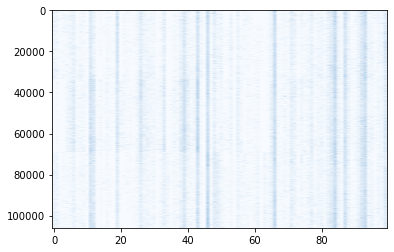

In [15]:
# Visualize it using plt.imshow
plt.imshow(data.iloc[:,:100], cmap='Blues', aspect='auto', vmin=0, vmax=1)

In [16]:
train_multi_targets = "train_multi_targets.h5"

In [17]:
with h5py.File(train_multi_targets, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    print(a_group_key)

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])
    
    group = f[a_group_key]      # returns as a h5py dataset object

    print(list(group.keys()))

    ## customized
    axis0 = group['axis0']
    print(type(axis0))

    axis0_RNA = axis0[()]
    axis1_RNA = group['axis1'][()]
    block0_items_RNA = group['block0_items'][()]
    block0_values_RNA = group['block0_values'][()]

Keys: <KeysViewHDF5 ['train_multi_targets']>
train_multi_targets
<class 'h5py._hl.group.Group'>
['axis0', 'axis1', 'block0_items', 'block0_values']
<class 'h5py._hl.dataset.Dataset'>


In [18]:
print(f"axis0 shape is {axis0_RNA.shape}\naxis1 shape is {axis1_RNA.shape}\nblock0_items shape is {block0_items_RNA.shape}\nblock0_values shape is {block0_values_RNA.shape}\n")

axis0 shape is (23418,)
axis1 shape is (105942,)
block0_items shape is (23418,)
block0_values shape is (105942, 23418)



In [19]:
sum(axis0_RNA != block0_items_RNA)
geno_loc_RNA= np.char.decode(axis0_RNA)
geno_loc_RNA[:20]

array(['ENSG00000121410', 'ENSG00000268895', 'ENSG00000175899',
       'ENSG00000245105', 'ENSG00000166535', 'ENSG00000256661',
       'ENSG00000184389', 'ENSG00000128274', 'ENSG00000094914',
       'ENSG00000081760', 'ENSG00000242908', 'ENSG00000109576',
       'ENSG00000103591', 'ENSG00000115977', 'ENSG00000087884',
       'ENSG00000127837', 'ENSG00000129673', 'ENSG00000131043',
       'ENSG00000205002', 'ENSG00000090861'], dtype='<U15')

In [20]:
cell_id_RNA = np.char.decode(axis1_RNA)
cell_id_RNA[:20]

array(['56390cf1b95e', 'fc0c60183c33', '9b4a87e22ad0', '81cccad8cd81',
       '15cb3d85c232', 'a7791bcf1152', '072790e768b1', '404459b1005b',
       '627a5071cbd7', '00f283126092', '627703f5faa0', '3894c8880096',
       'e0af51ad3900', 'e31ca103a4ac', '47711761153f', 'c9d7ec67e230',
       '4495e228dcbd', '89c1d660a925', '7d66e9fac697', '73e80a80ac36'],
      dtype='<U12')

In [21]:
cell_id_RNA.shape

(105942,)

In [22]:
data_RNA = pd.DataFrame(block0_values)
data_RNA.head().iloc[:,:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


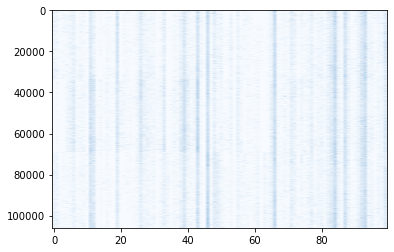

: 

In [23]:
# Visualize it using plt.imshow
plt.imshow(data_RNA.iloc[:,:100], cmap='Blues', aspect='auto', vmin=0, vmax=1)

In [22]:
# gc.collect()

114

: 

In [19]:
test_multi_inputs = "test_multi_inputs.h5"

In [20]:
with h5py.File(test_multi_inputs, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    print(a_group_key)

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])
    
    group = f[a_group_key]      # returns as a h5py dataset object

    print(list(group.keys()))

    d = {}
    for i in list(group.keys()):
        d[i] = group[i][()]
    # ## customized
    # axis0 = group['axis0']
    # print(type(axis0))

    # axis0_RNA = axis0[()]
    # axis1_RNA = group['axis1'][()]
    # block0_items_RNA = group['block0_items'][()]
    # block0_values_RNA = group['block0_values'][()]

Keys: <KeysViewHDF5 ['test_multi_inputs']>
test_multi_inputs
<class 'h5py._hl.group.Group'>
['axis0', 'axis1', 'block0_items', 'block0_values']


In [21]:
for key, val in d.items():
    print(f"{key} shape is {val.shape}")

axis0 shape is (228942,)
axis1 shape is (55935,)
block0_items shape is (228942,)
block0_values shape is (55935, 228942)


In [22]:
d['axis0']

array([b'GL000194.1:114519-115365', b'GL000194.1:55758-56597',
       b'GL000194.1:58217-58957', ..., b'chrY:7836768-7837671',
       b'chrY:7869454-7870371', b'chrY:7873814-7874709'], dtype='|S26')

In [23]:
d['axis1']

array([b'458c2ae2c9b1', b'01a0659b0710', b'028a8bc3f2ba', ...,
       b'05666c99aa48', b'121f946642b5', b'b847ba21f59f'], dtype='|S12')